In [1]:
import pandas as pd
import numpy as np
import skimage.io as sk
from skimage import img_as_ubyte
from skimage.io import imread
from scipy import spatial
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, MaxPooling2D, Conv2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
from PIL import Image
import cv2
import matplotlib.pyplot as plt
     

Text(0.5, 1.0, 'Forge_10')

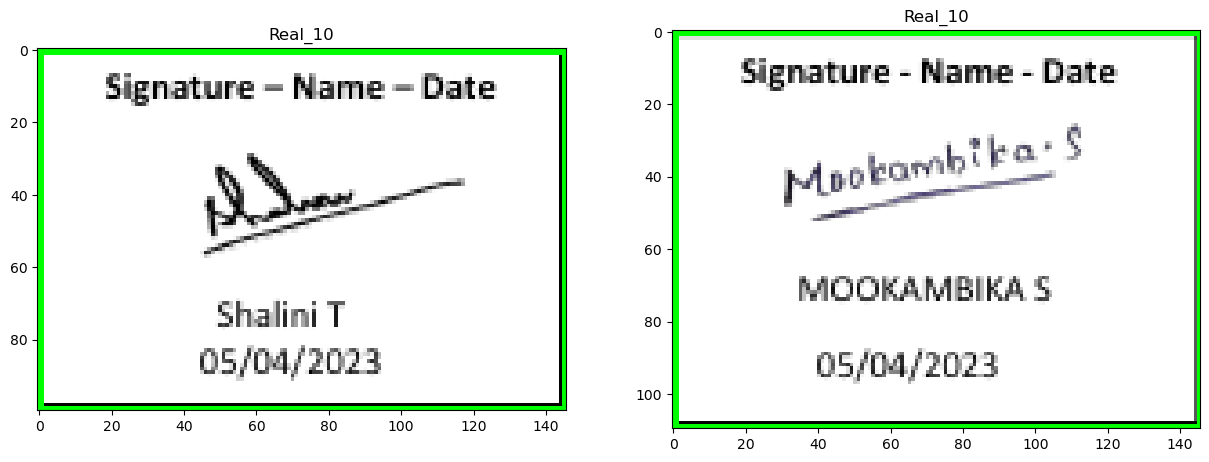

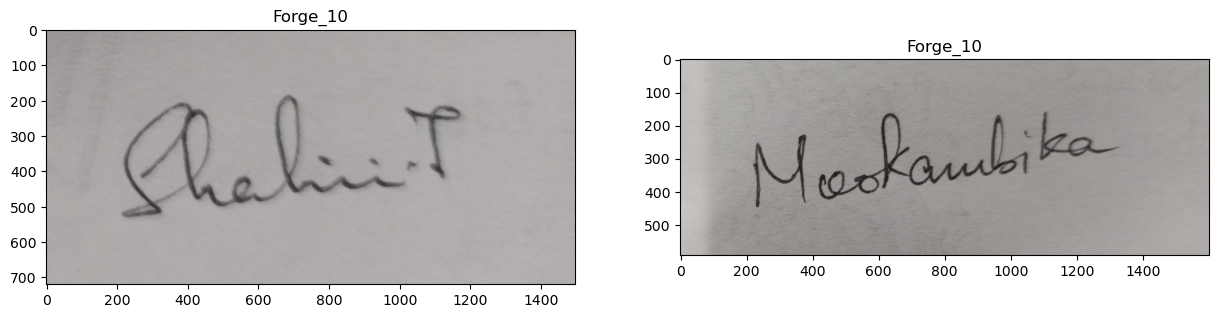

In [3]:
image1 = sk.imread("/Users/Lenovo/Desktop/SMLreports/SML-SIGNATURE/genuine_images/shalini-match.png")
image2 = sk.imread("/Users/Lenovo/Desktop/SMLreports/SML-SIGNATURE/genuine_images/mookambika-match.png")
fig, ax = plt.subplots(1,2, figsize = (15,10))
ax[0].imshow(image1)
ax[0].set_title("Real_10")
ax[1].imshow(image2)
ax[1].set_title("Real_10")
image3 = sk.imread("/Users/Lenovo/Desktop/SMLreports/SML-SIGNATURE/forged_images/shalini-mismatch.jpeg")
image4 = sk.imread("/Users/Lenovo/Desktop/SMLreports/SML-SIGNATURE/forged_images/mookambika-mismatch.jpeg")
fig, ax1 = plt.subplots(1,2, figsize = (15,10))
ax1[0].imshow(image3)
ax1[0].set_title("Forge_10")
ax1[1].imshow(image4)
ax1[1].set_title("Forge_10")

In [4]:
train_path = '/Users/Lenovo/Desktop/SMLreports/SML-SIGNATURE/training'
test_path = '/Users/Lenovo/Desktop/SMLreports/SML-SIGNATURE/testing'

In [5]:
Image_Width = 512
Image_Height = 512
Image_Size = (Image_Width, Image_Height)
Image_Channel = 3
batch_size=15

In [6]:
model = Sequential()

## Conv layer 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(Image_Width,Image_Height, Image_Channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 4
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 5
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 6
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 510, 510, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 255, 255, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 253, 253, 64)     2

In [8]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [early_stop, learning_rate_reduction]

In [9]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                  rescale=1./255,
                                  shear_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,)

In [10]:
train_generator = train_datagen.flow_from_directory('/Users/Lenovo/Desktop/SMLreports/SML-SIGNATURE/training',
                                              target_size=Image_Size,
                                              batch_size=22,
                                              class_mode = 'categorical')


Found 10 images belonging to 2 classes.


In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
test_generator = test_datagen.flow_from_directory('/Users/Lenovo/Desktop/SMLreports/SML-SIGNATURE/testing',
                                                  target_size=Image_Size,
                                                  batch_size = 2,
                                                  class_mode='categorical')

Found 10 images belonging to 2 classes.


In [13]:
epochs = 10

history = model.fit_generator(train_generator,
                             epochs=epochs,
                             validation_data=test_generator,
                             validation_steps=len(test_generator),
                             steps_per_epoch=len(train_generator),
                             callbacks=callbacks)
     

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15748\2069960286.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
1/1 [==============================] - 26s 26s/step - loss: 1.9859 - accuracy: 0.4000 - val_loss: 0.6944 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
1/1 [==============================] - 15s 15s/step - loss: 0.7174 - accuracy: 0.7000 - val_loss: 0.6465 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3/10
1/1 [==============================] - 14s 14s/step - loss: 0.5669 - accuracy: 0.7000 - val_loss: 0.6859 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/10
1/1 [==============================] - 14s 14s/step - loss: 0.3639 - accuracy: 0.8000 - val_loss: 0.7559 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/10
1/1 [==============================] - 13s 13s/step - loss: 0.2940 - accuracy: 0.9000 - val_loss: 0.8206 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/10
1/1 [==============================] - 13s 13s/step - loss: 0.3391 - accuracy: 0.8000 - val_loss: 0.8337 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/10
1/1 [==============================] - 13s 13s/step - loss: 0.4435 - accuracy

In [14]:
pip install matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [15]:
import matplotlib. pyplot as plt

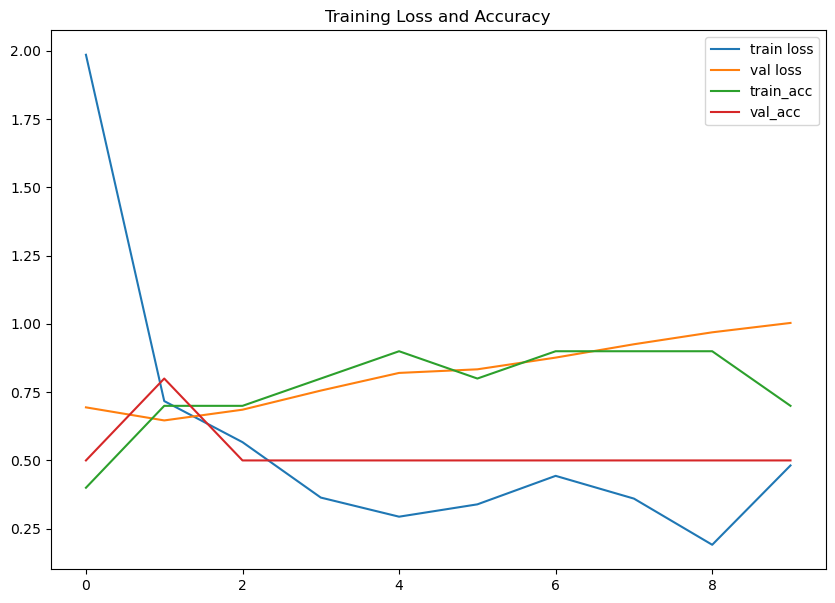

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Training Loss and Accuracy")
plt.legend()
plt.show()
plt.savefig('lossval_loss')

In [24]:
from tensorflow.keras.models import load_model

model.save('forge_real_signature_model.h5')

In [25]:
pred = model.predict(test_generator)
pred

5/5 [==============================] - 3s 438ms/step


array([[0.80189854, 0.19810142],
       [0.9270479 , 0.07295215],
       [0.8018456 , 0.1981544 ],
       [0.7992952 , 0.20070483],
       [0.7985349 , 0.2014651 ],
       [0.80371183, 0.19628818],
       [0.7941471 , 0.20585296],
       [0.8092558 , 0.19074424],
       [0.8561717 , 0.14382821],
       [0.85533226, 0.14466767]], dtype=float32)

In [26]:
import numpy as np
pred = np.argmax(pred, axis=1)
pred     

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
model = load_model('forge_real_signature_model.h5')

In [29]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/Users/Lenovo/Desktop/SMLreports/SML-SIGNATURE/training/shalinisign.jpg', target_size=(512,512))

In [30]:
x = image.img_to_array(img)
x

array([[[178., 180., 175.],
        [178., 180., 175.],
        [178., 180., 175.],
        ...,
        [169., 171., 166.],
        [171., 173., 168.],
        [169., 171., 166.]],

       [[178., 180., 175.],
        [178., 180., 175.],
        [178., 180., 175.],
        ...,
        [169., 171., 166.],
        [171., 173., 168.],
        [170., 172., 167.]],

       [[178., 180., 175.],
        [178., 180., 175.],
        [178., 180., 175.],
        ...,
        [170., 172., 167.],
        [172., 174., 169.],
        [171., 173., 168.]],

       ...,

       [[176., 181., 175.],
        [176., 181., 175.],
        [176., 181., 175.],
        ...,
        [164., 166., 161.],
        [163., 165., 160.],
        [162., 164., 159.]],

       [[176., 181., 175.],
        [176., 181., 175.],
        [176., 181., 175.],
        ...,
        [164., 166., 161.],
        [163., 165., 160.],
        [162., 164., 159.]],

       [[176., 181., 175.],
        [176., 181., 175.],
        [176., 1

In [31]:
x.shape

(512, 512, 3)

In [32]:
x = x/255

from tensorflow.keras.applications.resnet50 import preprocess_input

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 512, 512, 3)

In [33]:
model.predict(img_data)

1/1 [==============================] - 1s 589ms/step


array([[0., 1.]], dtype=float32)

In [34]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 256ms/step


In [35]:
if(a==1):
    print("The signature is not fraud")

else:
    print("The signature is fraud")


The signature is not fraud


In [36]:
print(a)

[1]


In [37]:
print(img)

<PIL.Image.Image image mode=RGB size=512x512 at 0x22A03342230>


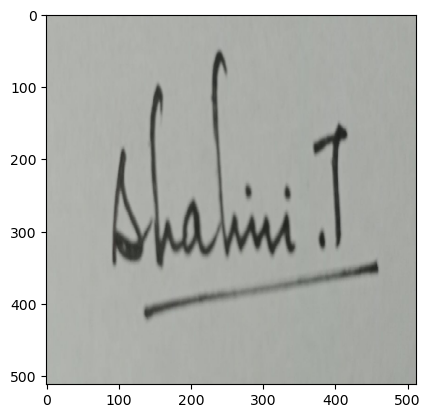

In [38]:
plt.imshow(img)